<a/ id='top'></a>
# Homework 3: Random Variables and Their Distributions
***

**Name**: Theodore Solomon Margoles

***

This assignment is due on Moodle by **5pm on Friday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [20 points] Problem 1

Suppose you are modeling the probability of observing flood levels of various heights when there is a storm in a particular coastal city.  Let $X$ be a random variable representing the observed flood height (in feet), which must be nonnegative. There are many different choices for probability density function (pdf) for $X$.  You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \ x \ e^{\left(-\frac{x^2}{10}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

for $f(x)$ to be a valid density function we know that, when we take the integral $\int_0^\infty\mathrm{cx}\mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$   must be equal to $1$.     we can pull the constant out of the integral like so:  $c\int_0^\infty\mathrm{x} \mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$ = $1$ but now we can divide both sides: and we now have
$c = \frac{1}{\int_0^\infty\mathrm{x} \mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x}$, now all we have to do is solve the integral and plug it into this formula. This integral can be solved with U substitution as follows:

$\int_0^\infty\mathrm{x} \mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$

let $U$ = $\frac{-x^2}{10}$  $dU$ = $\frac{-2x}{10}$ = $\frac{-x}{5}dx$  so if we multiply both sides by $-5$ we now get the resulting solvable integral: 


$-5\int_0^\infty\mathrm{e}^{u}\mathrm{d}u$ which is equal to $-5[e^{\frac{-x^2}{10}}$ from $x=0$ to $x=\infty]$ which is equal to $-5[0 - 1]=5$, so therefore when I plug $\int_0^\infty\mathrm{x} \mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x=5$ back into the formula: $c = \frac{1}{\int_0^\infty\mathrm{x} \mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x}$ I get $c = \frac{1}{5}$, which is the final normalizing constant. Therefore we have: 

$$
f(x) = \begin{cases}
         \frac{1}{5} \ x \ e^{\left(-\frac{x^2}{10}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$


**Part B**: Compute the cumulative density (cdf) function $F(x)$ for $X$.  Then, conduct two sanity checks: First, what should $F(0)$ equal?  Second, what should be the limit of $F(x)$ as $x \rightarrow \infty$?  Be sure to **justify** these answers. Verify that $F(0)$ and $\displaystyle \lim_{x\rightarrow \infty} F(x)$ satisfy your hypotheses using cdf you derived.

the $CDF$ for a certain value of $x \ = \ k$ will just be $P(x=k)$ = $F(k)$ = $\int_0^{k}\mathrm{\frac{1}{5}}\mathrm{x}\mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$          

**note that I am not going from $-\infty$ to $\infty$ because negative wave height is nonsensical, therefore we need only define $F(x)$ on  $[0,$ $\infty)$**

now to verify this, lets look first at $F(0)$ = the cumulative density at 0 = $\int_0^{0}\mathrm{\frac{1}{5}}\mathrm{x}\mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$ which will always solve to $0$. Good, this is correct, now lets move on to  $\displaystyle\lim_{x\rightarrow \infty} F(x)$ = $\displaystyle\lim_{x\rightarrow \infty} \int_0^{x}\mathrm{\frac{1}{5}}\mathrm{x}\mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$

which is equal to $\int_0^{\infty}\mathrm{\frac{1}{5}}\mathrm{x}\mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$ which as proved above in part $A$, will equal to $\frac{5}{5}$ = $1$ which is correct.

**Part C:**  Use the cdf you derived in **Part B** to calculate the median, $\tilde{x}$, of the probability density for $X$.

$F(k)$ = $\int_0^{k}\mathrm{\frac{1}{5}}\mathrm{x}\mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$ 

= $\frac{1}{5}\int_0^{k}\mathrm{x}\mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$

now the median value of the probability density function....

to find the median, we want to find some constant m, such that P(0 $\leq$ X $\leq$ m) == P(m $\leq$ X $\leq$ k)

but we know that $F(\infty)$ = $\int_0^{\infty}\mathrm{\frac{1}{5}}\mathrm{x}\mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$ == $1$ 

so therefore, for the two integrals, of the PDF to be equal each of their masses must be $\frac{1}{2}$ of the total probability density. So we can just solve this equation:

$\frac{1}{2}$ = $\int_0^{m}\mathrm{\frac{1}{5}}\mathrm{x}\mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$

we make the $U$ substitution of $U$ = $\frac{-x^2}{10}$, with $dU$ = $\frac{-x}{5} dx$

so, $-5dU$ = $x dx$, now with this substitution we get the following: 


$\frac{1}{2}$ = $-5\int_0^{m}\mathrm{\frac{1}{5}}\mathrm{e}^{U}\mathrm{d}U$, now the $\frac{1}{5}$ and the $-5$ cancel to $-1$,

so we get $\frac{1}{2}$ = $-\int_0^{m}\mathrm{e}^{U}\mathrm{d}U$

$\frac{1}{2}$ == $-(e^{\frac{-x^2}{10}}$ | from $x$ = $0$ to $x$ = $m$)

$\frac{1}{2}$ == $-e^{\frac{-m^2}{10}} + 1$ now lets subtract 1 from both sides

$-\frac{1}{2}$ == $-e^{\frac{-m^2}{10}}$

==$\frac{1}{2}$ == $e^{\frac{-m^2}{10}}$


$ln(\frac{1}{2})$ == $ln(e^{\frac{-m^2}{10}})$

$-0.6931$ == $\frac{-m^2}{10}$

== $6.931$ == $m^2$

$m$ == $2.63267924366$ == the median wave height is $2.63$. 

**Part D**: It is a well-known fact that if there is a storm in your coastal city, if the flood level exceeds 6 feet, then the town will become inundated with octopuses in an event known localy as **Octogeddon**. Use the cdf you computed in **Part B** to find the probability that a given storm is an Octogeddon. 

the probability that we are not in octogeddon is the chance that the flood level is less than or equal to 6 feet,
which is just $\frac{1}{5}\int_0^{6}\mathrm{x}\mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$

lets solve this again by using $U$-sub let $U$ = $\frac{-x^2}{10}$,  and so $dU$ = $\frac{-x}{5}dx$, so
we only need to multiply $\frac{1}{5}\int_0^{6}\mathrm{x}\mathrm{e}^{\frac{-x^2}{10}}\mathrm{d}x$ by $-5$ and plug in our $U$ and $dU$ and we just get
$-1\int_0^{6}\mathrm{e^U}\mathrm{dU}$ and we know the the antiderivative of any $e^{U}$ is also $e^{U}$ and so:

== $-1[e^{\frac{-6^2}{10}} - e^0]$ == $\frac{-1}{e^{\frac{36}{10}}} + 1$ == $-0.02732 + 1$ == $0.972676$

and so therefore, the probability that we are not in Octogeddon for a given flood is **$97.27 \space percent$**

**Part E:** You have been painstakingly collecting data on storms in your city, and have determined that storms occur at an average rate of 5 per year. To makes things a bit more precise, the pdf from **Part A** really describes the distribution of flood heights *given* that there is a storm, $P(X \mid \text{storm})$. You may assume that storms occur as independent events of one another.

What is the probability of observing 3 storms in a given year, none of which are Octogeddons?

That is, what is $P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms})$?

$X$ ~ $Pois(\lambda = 5)$, what is $P(X = 3)$ = $f(k=3)$ = $\frac{\lambda^3}{3!e^\lambda}$ == $\frac{125}{6e^5}$ == $0.14037389581$, 

so $P(3 \space Storms)$ = $0.14$, 

now, $P(3 \space nonOctogeddonStorms \cap  3 \space storms)$ = $P(3 \space nonOctogeddonStorms \space |\space 3 \space storms)P(3storms)$. 

the likely hood that a storm is not an octogeddon given that its a storm is 97 percent, $p$ = $0.97$

so the likely hood that we are 3 for 3 with non octogeddon storms is $(0.97)^3$ = 0.913

therefore $P(3$ $nonOctogeddonStorms$ $\cap$ $3$ $storms$) == $(0.913)(0.14)$ == $0.123$  so it is a $12.3$% chance that in a given year we have 3 storms, none of which are octogeddons.

In [2]:
import math
print(125/math.exp(5))

0.8422433748856835


<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [20 points] Problem 2

You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of times _between_ independent arrivals is often modeled using an Exponential distribution.  You observe the following:
* John's line checks-out an average of 4 customers per ten minutes,
* the self check-out machine checks-out an average of 5 customers per ten minutes **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per ten minutes if the machine is freezing up, and
* in any given moment, the self check-out machine has a probability of 0.1 of freezing up.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-customer times do in fact follow exponential distributions, what distributions do you expect the **number** of customers who pass through each line in a given 10-minute interval to follow?  What are the parameter(s) of each distribution?  Note that you should consider both the case where the self check-out is working properly and when it is broken.

Johns line could be represented with a Poisson distribution with parameter $\lambda$ = $4$. therefore $P_x(k)$ = $P(x \space = \space k)$ = $\frac{4^{k}}{k!}e^{-4}$

the self check-out machine has $\lambda$ = $5$ if working, $\lambda$ = $1$ if freezing therefore, we can just model it with two Poisson distr, one for each case: 

$P_x(k)$ = $P(x \space = \space k)$ = $\frac{5^{k}}{k!}e^{-5}$ **when working**

$P_x(k)$ = $P(x \space = \space k)$ = $\frac{1^{k}}{e(k!)}$  == $P_x(k)$ = $P(x \space = \space k)$ = $\frac{1}{e(k!)}$ **when not working**

**Part B**:  What is the probability that 6 customers pass through John's line in the next 10 minutes?  What about the self check-out, assuming that it is working?  What about the self check-out, assuming that it is frozen?

In [8]:
#for john we have to calculate 4^6 / 6! * e^-4.
import math
def fact(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * fact(n-1)
    pass


print("the probability that 6 pass through Johns line in the next 10 minutes is: ", ((4**6) / fact(6))*(math.exp(-4)))

the probability that 6 pass through Johns line in the next 10 minutes is:  0.1041956345670211


In [9]:

#for self-checkout if working we have to calculate 5^6/6! * e^-5

print("the probability that 6 pass through self checkout (when working) in next 10 min is: ", ((5**6)/fact(6))*math.exp(-5) )

the probability that 6 pass through self checkout (when working) in next 10 min is:  0.1462228081398756


In [10]:
#for self checkout if broken we havce to calculate 1/e(6!)
print("the probability that 6 pass through self checkout (when freezing) in next 10 min is: ", (1/fact(6))*math.exp(-5) )

the probability that 6 pass through self checkout (when freezing) in next 10 min is:  9.358259720952038e-06


**Part C:**  Use your answer to **Part B** and the Law of Total Probability to calculate the probability that the self check-out tends 6 customers is the next 10 minutes.

$P(x\space=\space6)$ = $P(6 \space|\space working)P(working)$ + $P(6 \space|\space freezing)P(freezing)$

== (0.14)(0.9) + (9.35e-6)(0.1) == *answer below in python output*

In [11]:
print("prob that self check-out tends 6 customers is: ", (0.14*0.9) + ((9.35)*(10**(-7))))

prob that self check-out tends 6 customers is:  0.12600093500000004


**Part D**:  S'pose John is working a 5-hour shift from 4-9 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  Calculate **exactly** (aside from rounding) the probability that he serves 100 or more customers during his shift.  (Assume we can safely scale our data up to a 5-hour interval.)

johns $PDF$ = $P_x(k)$ = $P(x \space = \space k)$ = $\frac{4^{k}}{k!}e^{-4}$

now, we want the $P(x >= 3.333)$, which is equal to $1 - P(x < 3.333)$, and this is just $1$ - $CDF(3.333)$

$CDF(3.333)$ = $\int_{-\infty}^{3.333}\mathrm{\frac{4^{3.333}}{3.333!}e^{-4}}{d}x$ 

 == $\frac{4^{3.333}}{3.333!}e^{-4}\int_{0}^{3.333}\mathrm{1}{d}x$ == since we cant have negative customers. 
 
 == $\frac{4^{3.333}}{3.333!}e^{-4}[3.333]$ == 0.669703
 
 == the probability that john servers 100 or more customers = 1 - 0.6697 = 0.3303
 
 == $33$ $percent$ likely john servers more than 100



**Part E**:  Write a function `checkout_count` to simulate the number of customers served by the self check-out machine in a 5-hour shift. At the very least, your function should take as input the working and broken customer arrival rate parameters, and the probability that the machine is working properly. Your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. Then, your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken). Your function should return the number of customer arrivals in a 5-hour shift. Use at least 5000 simulations.

Use this function to estimate the probability of the self check-out machine serves 100 or more customers in a 5-hour shift, and report your result.

Finally, use **this same function**, to verify your answer to **Part D**.

$P(x\space=\space100)$ = $P(100 \space|\space working)P(working)$ + $P(100 \space|\space freezing)P(freezing)$

100 in 5 hours, = 100 in 5*60 = $\frac{100}{300min}$, = $\frac{3.33}{10 min}$, == P(X = 3.33)

= P(x = 3.333) = P(3.333 | working)P(working) + P(3.333 | freezing)P(freezing)

$p(3.333$ | $working)$ $P_wx(3.333)$ = $P(x \space = \space 3.333)$ = $\frac{5^{3.333}}{3.333!}e^{-5}$ = $\frac{213.735}{9.256*{e^5}}$ == $0.1556$

$p(3.333$ | $freezing)$ == $P_x(3.333)$ = $P(x \space = \space 3.333)$ = $\frac{1^{3.333}}{e(3.333!)}$  == $P_x(3.333)$ = $P(x \space = \space 3.333)$ = $\frac{1}{e(3.333!)}$  == $0.0397434$

so therefore, P(x > 100) = $1$ - $(0.1556$ $*$ $0.9$ $+$ $0.0397$ $*$ $0.1)$ = $0.85599$ = $85.6$ percent

**Caution!**  Be aware that in some Numpy or Scipy functions for distribution and/or random variables, the conventions for the parameter arguments may differ from those used in class.

In [25]:
functional = ["W", "F"] #working, freezing, 

random_variation = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0,5]

def checkout_count(time_len, rate_work, rate_broken, p, nrounds):
    rounds = [i for i in range(nrounds)]
    approx_served = 0
    res_array = []
    for rou in rounds:
        minutes = [i for i in range(time_len)]
        for minu in minutes:
            isworking = (np.random.choice(functional, p = [p, 1-p], size=1) == "W")
            if(isworking):
                approx_served += rate_work/10
            else:
                approx_served += rate_broken/10
        res_array.append(approx_served)
        approx_served = 0
    
    num_customers = sum(res_array) / len(res_array)  
    return num_customers

res = []
for i in range(5):
    res.append(checkout_count(300, 5, 1, 0.9, 100))

print(res, sum(res)/5)


[138.06799999999998, 137.62799999999993, 138.12399999999994, 137.956, 137.724] 137.89999999999995


In [34]:
johns_success = ["F", "S"]
data = []
def johns_turn():
    people_served = 0
    ten_min_rounds = [j for j in range(30)]
    for rnd in ten_min_rounds:
        isMoreTen = np.random.choice(johns_success, p=[2/3,1/3])=="S"
        if isMoreTen:
            people_served += 11
        else:
            people_served += 1
    print(people_served)
    return people_served


def sim_john():
    rmh = 0
    rlh = 0
    for i in range(1000):
        t = johns_turn()
        if(t > 100):
            rmh += 1
        else:
            rlh += 1
    return rmh / (rmh + rlh)

print(sim_john())
    
    
            

110
130
180
100
220
90
130
160
120
150
110
110
140
130
120
100
140
160
100
180
130
130
110
170
120
110
180
120
120
170
160
150
140
130
120
110
160
180
160
90
170
110
100
130
90
90
110
160
90
120
120
110
130
90
140
120
110
170
150
130
140
110
120
130
70
130
150
110
140
60
150
140
170
130
150
150
130
140
90
120
100
80
90
130
120
130
130
120
110
100
160
100
150
140
150
130
150
120
170
150
60
140
130
140
130
100
110
130
150
140
130
110
100
160
90
170
130
150
90
100
110
90
140
140
170
180
110
80
120
110
120
160
150
140
90
130
110
160
110
140
100
150
120
90
160
100
150
130
100
130
100
170
100
140
150
170
150
170
180
50
100
160
110
130
120
120
120
140
110
130
140
130
120
130
190
130
110
140
100
100
140
80
130
130
130
150
110
160
100
110
120
170
120
210
140
100
120
130
170
110
130
130
120
80
130
130
130
110
110
150
100
130
100
160
120
130
150
110
120
110
170
150
130
90
130
120
110
130
170
130
120
120
100
180
120
140
130
70
110
120
130
130
160
70
140
180
150
140
130
80
130
110
120
160
60
150
16

**Part F:** Comment on the results you found in **Part E** for the probabilities that John and the self check-out machine will serve 100 or more customers in a 5-hour block. Which seems like a better investment for the grocery store?

**the automated machine appears to be a better choice, the probability of the automated machine to get over 100 seems closer to 90%, while the probability that john serves more than 100 is only 33 percent. My results for testing johns speed is less accurate than the direct calculation by a lot. **

### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [41]:
import math
def pmf_natural(x):
    return math.log10((x+1)/x)

sums = 0
for i in range(1, 10):
    sums += pmf_natural(i)
    print(sums)

print("this is a well defined probability mass function because sum of Sigma = ", sums)

0.3010299956639812
0.47712125471966244
0.6020599913279624
0.6989700043360189
0.7781512503836436
0.8450980400142568
0.9030899869919435
0.9542425094393249
1.0
this is a well defined probability mass function because sum of Sigma =  1.0


**Part B**: Use the function you wrote above to make two bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. Please make one plot directly above the other. 

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [43]:
def cdf_natural(y):
    cdf = 0
    for i in range(1, y+1):
        cdf += pmf_natural(i)
    return cdf  

print(cdf_natural(4), cdf_natural(5))

0.6989700043360189 0.7781512503836436


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

In [52]:
df = pd.read_table("tax_data.txt", )
count = 1
probs = []
cdfs = []
for TI in df["Tax Incomes"]:
        count += 1
        num = TI
        l_of_n =  list(str(num))
        var = int(l_of_n[0])
        if var:
            p = pmf_natural(var)
            cdf = cdf_natural(var)
        else:
            p = 0
            cdf = 0
        probs.append(p)
        cdfs.append(cdf)
print(sum(probs)/len(probs))
print(sum(cdfs)/len(cdfs))

#therefore the average probability that the first digit came up is 16 percent
#and the average CDF, which is probability that x is less than or equal to a number in the dataset is 52 percent. 



0.16840762543559643
0.5291475321563236


### [20 points] Problem 4
***

Well. They're back at it. Tony and Dan are honing their lightsaber skills, and this time they've got a _new_ tournament format. (They wouldn't have had to switch formats, but you figured out all the probabilities for their previous tournament format two weeks ago, so this is on you.)

The new format is a _Best-of-9 Series_ of individual duels. The first professor to win 5 duels is declared the winner. Each duel can be considered to be independent of all previous duels. Moreover, a rigorous statistical analysis of Tony's and Dan's strengths, weaknesses, and handwriting, has revealed that Tony has an edge: the probability that Tony wins any one duel against Dan is given by $p=0.56$.

**Part A**: What is the probability that Tony wins the 9-duel series on the 8th duel? 

In [3]:
def fact(n):
    if n < 2:
        return 1
    else:
        return n * fact(n - 1)
    
def n_choose_k(n, k):
    return fact(n)/(fact(n-k)*fact(k))

print(n_choose_k(10, 3))
    

120.0


$X$ ~ $NB$(r=5, p), k = 8 flips, ==

${k - 1}\choose{r - 1}$$p^r$$(1-p)^{k - r}$ ==

${7}\choose{4}$$p^5$$(1-p)^{3}$  == 0.1642 as python has gracefully calculated below VV

so therefore the probability that tony wins the 9 duel series on the k = 8th duel, is 16.42%. 



**Part B**: What is the probability that Tony wins the 9-duel series in _any_ valid number of duels? 

tony can win on the 5th -- 9th duel that takes place. since noone can tie at most we have 9 duels. 


In [12]:

def p_tonyW_on_k(k, p):
    if k < 5 or k > 9:
        return 0
    else:
        return n_choose_k(k-1, 4)*(p**5)*((1-p)**(k - 5))
    
def tonyW_onAny(p):
    tprob = 0
    for k in range(5, 10):
        tprob += p_tonyW_on_k(k, p)
    return tprob

print("the probability that tony wins on any valid round is: ", tonyW_onAny(0.56))

the probability that tony wins on any valid round is:  0.6448577403630387


**Part C**: The winner of the tournament will take home \$10,000 to use for a giant home aquarium for Stella the Octopus. Because the stakes are so high, Tony has decided to hire a famous Jedi consultant, Darth Ketelsen, to help him prepare for each duel. 

With Ketelsen's help, Tony's probability of winning any given match increases to $p = 0.7$. Ketelsen charges a fee of \$90 per game, but as a testament to her confidence in her abilities, only charges Tony the \$90 for games that he wins and _only if Tony wins the whole tournament_.  So, if Tony competes in a 9-duel tournament and wins, he will take home \$10,000 _minus_ \$450 for Darth Ketelsen's fees, for a total payout of \$9,550.  What is the expected payout for a 9-duel series?   

$E[payout]$ = (payout | win)P(win) + (payout | loss)P(loss) == 0.901(9550) + 0== $8604.55$

the expected payout is $8604$ dollars. 

In [14]:
print("p tony wins overall is now: ", tonyW_onAny(0.7))
print(0.901*9550)

p tony wins overall is now:  0.9011913399999999
8604.550000000001


**Part D**: This year the Jedi Knight Lightsaber-on-Lightsaber Association (the JKLOL Assoc) is implementing an experimental rule: Since Tony is rumored to be the stronger duelist, he gets to _choose_ the length of the championship tournament! Specifically, he can choose the series to be any odd length, from $N=3, 5, 7 \dots, 99$ duels long. Assuming that Tony continues to use the service of Darth Ketelsen, and considering the fact that Tony has a better-than-even chance of winning each duel, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 

In [28]:

def cdf(p, i):
    sums = 0
    for j in range(5, i+1):
        sums += p_tonyW_on_k(j, p)
    return sums


if tony chooses a short series, then he lowers his chances of winning because he doesnt allow himself time to cumulate his small advantage over many independent trials, the probability that tony wins by a certain round is the sum of the probability that he wins on all rounds before that, and this number increases at each trial since tony has a slight edge on each encounter, tony should choose the biggest odd number he can. If he chooses 5 he is forcing himself to win in 5 duels which has a around 5-6% chance of actually working. Now in terms of expected payout we can say that clearly if he chooses a longer duel time, the probability of winning the 9,550 goes up and so the expected payout approaches 9,550 as n approaches $\infty$ rounds. 

**Part E**: Write a function `optimal_series` that takes in $p$, the probability that Tony wins an individual duel, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

optimal round:  99


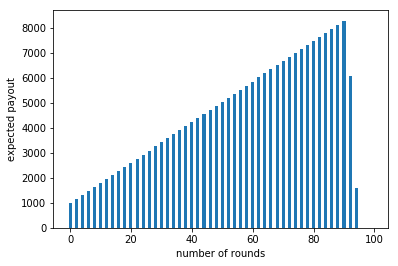

In [62]:
expected_payouts = [0 for i in range(100)]
def optimal_series(p):
    for i in range(100):
        if i%2: #odd number
            p_get_pay = cdf(p, i)
            epay = (10000 - (90*i))*(p_get_pay)
            expected_payouts[i] = epay
    maxpay = 0
    maxindex = 0
    for i in range(100):
        if i%2 and expected_payouts[i] > maxpay:
            maxpay = expected_payouts[i]
            maxindex = i
    return i
    
#matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)[source]
i = optimal_series(0.7)
print("optimal round: ", i)
plt.bar([i for i in reversed(range(100))], expected_payouts,  1, 1)
plt.xlabel("number of rounds")
plt.ylabel("expected payout")
plt.show()

### [20 points] Problem 5

Cement your superior stochastic simulation skills by solving some straightforward simulation scenarios.

**Part A**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, two cards are sequentially chosen which have either identical value or _adjacent_ value. You may let Aces be high or low, but not both.

In [96]:


def pick_two_seq_or_two_adj(num_trials):
    value = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
    total_trials = [i for i in range(num_trials)]
    identical_val = 0
    adjacent_val = 0
    for trial in total_trials:
        p2 = [4/52 for i in range(1, 14)]
        draw_one = np.random.choice(value, p=np.array([4/52 for i in range(1, 14)]), size=1)
        p2 = [4/51 for j in range(1, 14)]
        p2[int(draw_one-1)] = (3/51)
        draw_two = int(np.random.choice(value, p=p2))
        if draw_one == draw_two:
            identical_val += 1
        if abs(draw_one - draw_two) == 1:
            adjacent_val += 1
    return (identical_val + adjacent_val) / (len(total_trials))

print("the prob we pick two with the same value, or pick two sequential values: ", pick_two_seq_or_two_adj(10000))
    

the prob we pick two with the same value, or pick two sequential values:  0.2033


**Part B**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, three cards are sequentially chosen which form a run, e.g. 4-5-6 or 9-10-J. (The cards do not need to be drawn in order, like 4,5,6... any order is fine, like 6,4,5.) You may let Aces be high or low, but not both.

In [14]:
def adjust_p_array(p, i, nleft):
    ni = p[i]*nleft
    if ni > 0 and nleft > 0:
        p[i] = (ni-1) / (nleft - 1)
        for j in range(len(p)):
            if j != i:
                nj = p[j]*nleft
                p[j] = nj/(nleft - 1)
        return p
    return p

def ptrial(value, nruns, nfails, nleft):
        p2 = [4/52 for i in range(1, 14)]
        draw_one = np.random.choice(value, p=np.array([4/52 for i in range(1, 14)]), size=1)
        p2 = adjust_p_array(p2, int(draw_one-1), nleft)
        nleft -= 1
        
        draw_two = np.random.choice(value, p=p2, size=1)
        p2 = adjust_p_array(p2, int(draw_two-1), nleft)
        nleft -= 1
        
        draw_three = np.random.choice(value, p=p2, size=1)
        p2 = adjust_p_array(p2, int(draw_two-2), nleft)
        
        nleft = 52
        
        if max([draw_one, draw_two, draw_three]) - min([draw_one, draw_two, draw_three]) == 2:
            #run feasible
            marray = []
            marray.append(draw_one)
            marray.append(draw_two)
            marray.append(draw_three)
            draws_s = sorted(marray)
            if draws_s[1] != draws_s[0] and draws_s[1] != draws_s[2]: #run occured because [a, b, c], c-a == 2, and the min element not equal to the other two elements of the SORTED array of the three
                nruns += 1
            else:
                nfails += 1
        else:
            nfails += 1
        return nruns, nfails, nleft

def p_of_run(ntrials):
    value = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
    total_trials = [i for i in range(ntrials)]
    nleft = 52
    nruns = 0
    nfails = 0
    for trial in total_trials:
        nruns, nfails, nleft = ptrial(value, nruns, nfails, nleft)          
    return nruns / (nruns + nfails)


print("the probability of drawing 3 cards in a row from a shuffled deck: ", p_of_run(1000))
        
        

the probability of drawing 3 cards in a row from a shuffled deck:  0.027


**Part C**: When flipping over cards, sequentially, from a randomly shuffled deck, what is the probability that the third Ace will be revealed between flips 16 and 24, inclusively?


In [9]:
def p_third_ace_(lo, hi, numtrials):
    value = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
    res = []
    for trial in range(numtrials):
        p2 = [4/52 for i in range(1, 14)]
        nleft = 52
        ace_count = 0
        found = False
        cc = 0
        while not found and cc < 24: #loop for 24 possible card draws, last will be when cc = 23 which is the 24th draw, 
            cc += 1
            for i in range(len(p2)):
                if p2[i] < 0:
                    p2[i] = 0
            draw_i = np.random.choice(value, p=p2, size=1)
            if nleft > 0:
                p2 = adjust_p_array(p2, int(draw_i-1), nleft)
            nleft -= 1
            if draw_i == 1:
                ace_count += 1
                #print("A: ", ace_count)
            if ace_count == 3:
                if cc >= lo:
                    res.append(True)
                elif cc < lo:
                    res.append(False)
                found = True
    sumres = 0
    for result in res:
        if result == True:
            sumres += 1
        else:
            sumres += 0
    if sumres:
        return sumres / len(res)
    else:
        return 0

print(p_third_ace_(16, 24, 10000))
    

0.7473769168684423


**Part D**: Using a stochastic simulation, determine the probability mass function for: the probability that the first card drawn is an $X$, given that the card was part of a 3-card sequence (as in Part B). Express your PMF as a bar graph. Explain why it has the shape that it has.

In [23]:
xcounter = 0;
def ptrialMod(value, nruns, nfails, nleft, cardValue, xcounter):
        p2 = [4/52 for i in range(1, 14)]
        draw_one = np.random.choice(value, p=np.array([4/52 for i in range(1, 14)]), size=1)
        p2 = adjust_p_array(p2, int(draw_one-1), nleft)
        nleft -= 1
        
        draw_two = np.random.choice(value, p=p2, size=1)
        p2 = adjust_p_array(p2, int(draw_two-1), nleft)
        nleft -= 1
        
        draw_three = np.random.choice(value, p=p2, size=1)
        p2 = adjust_p_array(p2, int(draw_two-2), nleft)
        
        nleft = 52
        
        if max([draw_one, draw_two, draw_three]) - min([draw_one, draw_two, draw_three]) == 2:
            #run feasible
            marray = []
            marray.append(draw_one)
            marray.append(draw_two)
            marray.append(draw_three)
            draws_s = sorted(marray)
            if draws_s[1] != draws_s[0] and draws_s[1] != draws_s[2]: #run occured because [a, b, c], c-a == 2, and the min element not equal to the other two elements of the SORTED array of the three
                nruns += 1
                if draw_one == cardValue:
                    xcounter += 1
            else:
                nfails += 1
        else:
            nfails += 1
        return nruns, nfails, nleft

def PofXandRun(ntrials, X):
    value = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
    total_trials = [i for i in range(ntrials)]
    nleft = 52
    nruns = 0
    nfails = 0
    for trial in total_trials:
        nruns, nfails, nleft = ptrialMod(value, nruns, nfails, nleft, X, xcounter)          
    return xcounter / (nruns + nfails)


PofXandRun(100000, 13)

0.0